In [33]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
#from scipy.spatial.distance import squareform
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [23]:
#Generating Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

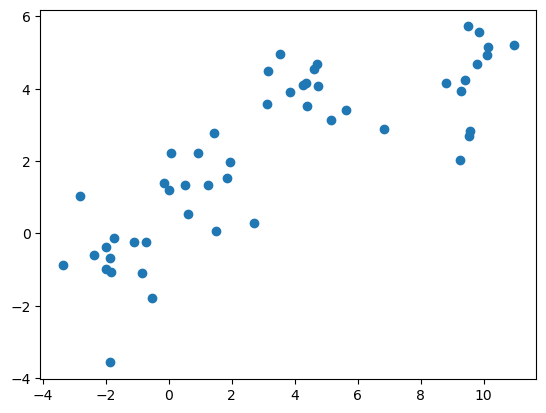

In [24]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 
plt.show()

In [25]:
#Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [26]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

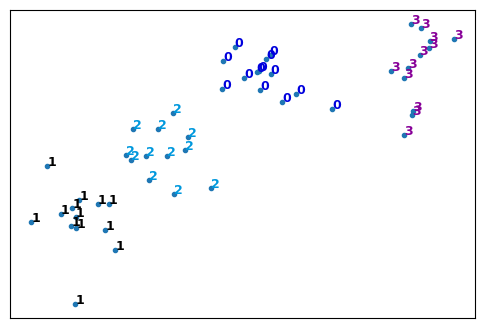

In [27]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [28]:
#Dendrogram Associated for the Agglomerative Hierarchical Clustering
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.7186264  0.5712391  ... 0.33249399 0.16522869 0.39436057]
 [0.7186264  0.         0.20657748 ... 0.41048716 0.78953665 0.3248067 ]
 [0.5712391  0.20657748 0.         ... 0.24015013 0.61269016 0.19873702]
 ...
 [0.33249399 0.41048716 0.24015013 ... 0.         0.37948806 0.10966937]
 [0.16522869 0.78953665 0.61269016 ... 0.37948806 0.         0.47135906]
 [0.39436057 0.3248067  0.19873702 ... 0.10966937 0.47135906 0.        ]]


In [34]:
condensed_dist_vector = squareform(dist_matrix)
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)

/tmp/ipykernel_55796/2332113683.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')
